In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim

from src.models import CifarResNet, MNIST_CNN, CIFAR_CNN
from src.helpers import evaluate_rob_accuracy, evaluate_clean_accuracy, load_model, safe_model,_evaluate_model
from src.data_loader import load_torchvision_dataset, load_imagenette
#from src.pruning import identify_layers, _evaluate_sparsity

import time

if torch.cuda.is_available() == True:
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
print(device)
dtype = torch.float32

cuda:0


In [2]:
model = CifarResNet()
model.to(device)
train_loader, test_loader = load_torchvision_dataset('CIFAR10', data_augmentation=True)

identifying layers
Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_stats = model.fit_fast_with_double_update(train_loader, test_loader, 200, device, patience=10)

[1,     1] loss: 26.58990, train_accuracy: 13.67
[1,    11] loss: 4.96804, train_accuracy: 17.38
[1,    21] loss: 3.20883, train_accuracy: 22.46
[1,    31] loss: 2.34026, train_accuracy: 19.73
[1,    41] loss: 2.71840, train_accuracy: 21.88
[1,    51] loss: 2.25298, train_accuracy: 23.24
[1,    61] loss: 2.22834, train_accuracy: 25.98
[1,    71] loss: 2.10803, train_accuracy: 27.54
[1,    81] loss: 2.07775, train_accuracy: 24.22
[1,    91] loss: 2.21451, train_accuracy: 26.76
duration: 244 s - train loss: 3.58441 - train accuracy: 22.38 - validation loss: 1.86155 - validation accuracy: 35.52 
[2,     1] loss: 1.86118, train_accuracy: 34.96
[2,    11] loss: 1.94095, train_accuracy: 30.86
[2,    21] loss: 1.79391, train_accuracy: 33.79
[2,    31] loss: 1.94331, train_accuracy: 30.47
[2,    41] loss: 1.78052, train_accuracy: 33.01
[2,    51] loss: 1.83248, train_accuracy: 31.05
[2,    61] loss: 1.79862, train_accuracy: 35.55
[2,    71] loss: 1.84687, train_accuracy: 35.16
[2,    81] loss:

[14,    81] loss: 1.06592, train_accuracy: 62.11
[14,    91] loss: 0.99708, train_accuracy: 64.06
duration: 203 s - train loss: 1.07524 - train accuracy: 62.20 - validation loss: 0.82494 - validation accuracy: 72.85 
[15,     1] loss: 0.97796, train_accuracy: 66.60
[15,    11] loss: 1.04797, train_accuracy: 63.48
[15,    21] loss: 1.06997, train_accuracy: 64.45
[15,    31] loss: 1.06401, train_accuracy: 63.48
[15,    41] loss: 1.02567, train_accuracy: 63.48
[15,    51] loss: 1.07873, train_accuracy: 60.94
[15,    61] loss: 1.02886, train_accuracy: 62.50
[15,    71] loss: 1.01859, train_accuracy: 65.43
[15,    81] loss: 0.92845, train_accuracy: 67.38
[15,    91] loss: 0.93883, train_accuracy: 65.43
duration: 204 s - train loss: 1.03899 - train accuracy: 63.48 - validation loss: 0.77475 - validation accuracy: 74.14 
[16,     1] loss: 0.99977, train_accuracy: 63.87
[16,    11] loss: 1.13768, train_accuracy: 59.57
[16,    21] loss: 1.02379, train_accuracy: 63.87
[16,    31] loss: 1.00238, 

[28,    21] loss: 0.87341, train_accuracy: 70.31
[28,    31] loss: 0.76306, train_accuracy: 74.22
[28,    41] loss: 0.77835, train_accuracy: 71.88
[28,    51] loss: 0.85514, train_accuracy: 69.73
[28,    61] loss: 0.84042, train_accuracy: 70.51
[28,    71] loss: 0.80664, train_accuracy: 72.66
[28,    81] loss: 0.87626, train_accuracy: 69.92
[28,    91] loss: 0.81195, train_accuracy: 73.44
duration: 202 s - train loss: 0.80389 - train accuracy: 71.97 - validation loss: 0.57537 - validation accuracy: 80.05 
[29,     1] loss: 0.73117, train_accuracy: 74.41
[29,    11] loss: 0.82258, train_accuracy: 71.29
[29,    21] loss: 0.80601, train_accuracy: 71.29
[29,    31] loss: 0.85544, train_accuracy: 70.70
[29,    41] loss: 0.76079, train_accuracy: 71.29
[29,    51] loss: 0.84357, train_accuracy: 71.48
[29,    61] loss: 0.77290, train_accuracy: 72.27
[29,    71] loss: 0.84685, train_accuracy: 71.29
[29,    81] loss: 0.82359, train_accuracy: 70.12
[29,    91] loss: 0.77081, train_accuracy: 73.83

[41,    81] loss: 0.64466, train_accuracy: 78.12
[41,    91] loss: 0.66725, train_accuracy: 78.32
duration: 204 s - train loss: 0.67312 - train accuracy: 76.42 - validation loss: 0.49874 - validation accuracy: 83.12 
[42,     1] loss: 0.69073, train_accuracy: 75.78
[42,    11] loss: 0.59851, train_accuracy: 78.71
[42,    21] loss: 0.69269, train_accuracy: 74.80
[42,    31] loss: 0.67937, train_accuracy: 76.37
[42,    41] loss: 0.73605, train_accuracy: 74.02
[42,    51] loss: 0.65319, train_accuracy: 78.12
[42,    61] loss: 0.66393, train_accuracy: 76.76
[42,    71] loss: 0.72300, train_accuracy: 73.63
[42,    81] loss: 0.71289, train_accuracy: 75.59
[42,    91] loss: 0.63579, train_accuracy: 79.88
duration: 202 s - train loss: 0.66189 - train accuracy: 76.86 - validation loss: 0.47142 - validation accuracy: 83.77 
[43,     1] loss: 0.63230, train_accuracy: 78.52
[43,    11] loss: 0.64205, train_accuracy: 79.30
[43,    21] loss: 0.71912, train_accuracy: 74.80
[43,    31] loss: 0.62589, 

[55,    21] loss: 0.65320, train_accuracy: 75.00
[55,    31] loss: 0.61905, train_accuracy: 77.93
[55,    41] loss: 0.54374, train_accuracy: 80.27
[55,    51] loss: 0.61409, train_accuracy: 77.34
[55,    61] loss: 0.55581, train_accuracy: 81.05
[55,    71] loss: 0.60177, train_accuracy: 78.12
[55,    81] loss: 0.54138, train_accuracy: 80.08
[55,    91] loss: 0.54845, train_accuracy: 80.66
duration: 202 s - train loss: 0.57976 - train accuracy: 79.79 - validation loss: 0.43790 - validation accuracy: 85.88 
[56,     1] loss: 0.54258, train_accuracy: 82.03
[56,    11] loss: 0.59774, train_accuracy: 79.49
[56,    21] loss: 0.54041, train_accuracy: 79.30
[56,    31] loss: 0.59775, train_accuracy: 80.86
[56,    41] loss: 0.61545, train_accuracy: 78.12
[56,    51] loss: 0.58405, train_accuracy: 79.49
[56,    61] loss: 0.55920, train_accuracy: 80.86
[56,    71] loss: 0.58136, train_accuracy: 79.69
[56,    81] loss: 0.55103, train_accuracy: 80.27
[56,    91] loss: 0.63530, train_accuracy: 76.17

[68,    81] loss: 0.46528, train_accuracy: 84.77
[68,    91] loss: 0.61152, train_accuracy: 79.88
duration: 208 s - train loss: 0.51968 - train accuracy: 81.92 - validation loss: 0.41543 - validation accuracy: 86.69 
[69,     1] loss: 0.56332, train_accuracy: 80.66
[69,    11] loss: 0.52380, train_accuracy: 79.49
[69,    21] loss: 0.48846, train_accuracy: 82.81
[69,    31] loss: 0.48064, train_accuracy: 83.79
[69,    41] loss: 0.47840, train_accuracy: 83.20
[69,    51] loss: 0.53844, train_accuracy: 82.42
[69,    61] loss: 0.42816, train_accuracy: 85.55
[69,    71] loss: 0.50031, train_accuracy: 83.98
[69,    81] loss: 0.48203, train_accuracy: 82.81
[69,    91] loss: 0.42038, train_accuracy: 85.55
duration: 202 s - train loss: 0.50964 - train accuracy: 82.10 - validation loss: 0.40720 - validation accuracy: 86.87 
[70,     1] loss: 0.45840, train_accuracy: 84.77
[70,    11] loss: 0.55968, train_accuracy: 81.25
[70,    21] loss: 0.47621, train_accuracy: 82.42
[70,    31] loss: 0.50272, 

[82,    21] loss: 0.49056, train_accuracy: 83.01
[82,    31] loss: 0.47792, train_accuracy: 83.98
[82,    41] loss: 0.39302, train_accuracy: 86.52
[82,    51] loss: 0.45010, train_accuracy: 82.81
[82,    61] loss: 0.45318, train_accuracy: 85.16
[82,    71] loss: 0.44153, train_accuracy: 85.16
[82,    81] loss: 0.50203, train_accuracy: 83.59
[82,    91] loss: 0.52620, train_accuracy: 83.40
duration: 208 s - train loss: 0.46048 - train accuracy: 83.97 - validation loss: 0.42966 - validation accuracy: 86.98 
[83,     1] loss: 0.44215, train_accuracy: 83.79
[83,    11] loss: 0.46379, train_accuracy: 84.77
[83,    21] loss: 0.41687, train_accuracy: 85.55
[83,    31] loss: 0.44630, train_accuracy: 84.38
[83,    41] loss: 0.44130, train_accuracy: 84.96
[83,    51] loss: 0.41315, train_accuracy: 85.55
[83,    61] loss: 0.46764, train_accuracy: 83.98
[83,    71] loss: 0.46818, train_accuracy: 83.20
[83,    81] loss: 0.40795, train_accuracy: 86.13
[83,    91] loss: 0.56759, train_accuracy: 81.25

<AxesSubplot:xlabel='epoch'>

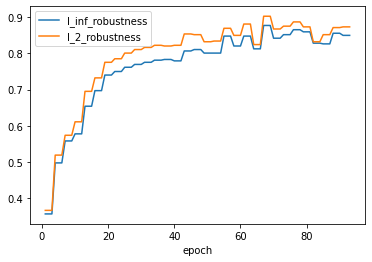

In [12]:
train_stats.plot(x='epoch', y=['l_inf_robustness', 'l_2_robustness'])

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [19]:
PATH='./saved-models/fast-double-vs-standard-experiment-standard-fast-training.pt'
optimizer = train_stats['optimizer'][0]
safe_model(PATH, model, optimizer, description='Comparing fast adversarial training with single and double updates', loss='N/A',epoch='92')

'./saved-models/fast-double-vs-standard-experiment-standard-fast-training.pt'